# POS Tagging and NER

## Practical part
Load the text "The Time Machine" by H.G. Wells from your txt-file into a string variable.

In [3]:
with open("time_machine.txt") as file:
    content = file.read()

## POS Tagging
- Use SpaCy to generate POS tags for The Time Machine.
- Extract for each word its original form, its lemma, UPOS and detail POS token.
- Group the words by the binary flag is_alpha. What can you use it for?
- Search the concept of stop words. Remove stop words from the text.
- Create a word cloud of nouns and another ones for verbs.

References
- https://universaldependencies.org/u/pos/

- English model `en_core_web_sm` not installed:
- `import sys` and `!{sys.executable} -m spacy download en_core_web_sm`

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS  

def get_alpha_words_from_file(file):
    with open(file) as fl:
        content = fl.read()
        doc = nlp(content)
        alpha = []
        non_alpha = []
        for token in doc:
            detail = {"word": token, "lemma": token.lemma_, "upos": token.pos_, 
                    "pos_token": token.tag_, "is_alpha": token.is_alpha}
            if token.is_stop is False:
                if token.is_alpha:
                    alpha.append(detail)
                else:
                    non_alpha.append(detail)
        return alpha

print(get_alpha_words_from_file("time_machine_short.txt"))

[{'word': Project, 'lemma': 'Project', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': Gutenberg, 'lemma': 'Gutenberg', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': eBook, 'lemma': 'eBook', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': Time, 'lemma': 'Time', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': Machine, 'lemma': 'Machine', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': Wells, 'lemma': 'Wells', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': eBook, 'lemma': 'eBook', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': use, 'lemma': 'use', 'upos': 'NOUN', 'pos_token': 'NN', 'is_alpha': True}, {'word': United, 'lemma': 'United', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': States, 'lemma': 'States', 'upos': 'PROPN', 'pos_token': 'NNP', 'is_alpha': True}, {'word': parts, 'lemma': 'part', 'upos': 'NOUN', 'pos_token': 'NNS', 'is_alpha': True},

#### Wordcloud

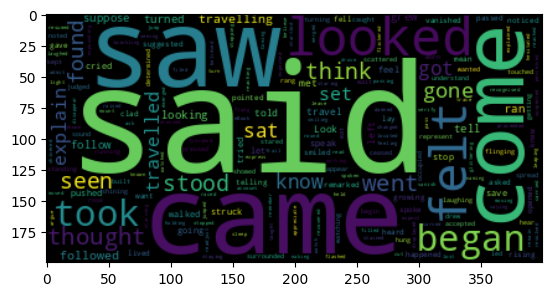

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load("en_core_web_sm")

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS  

def get_alpha_words_from_file(file):
    with open(file) as fl:
        content = fl.read()
        doc = nlp(content)
        alpha = []
        non_alpha = []
        for token in doc:
            detail = {"word": token, "lemma": token.lemma_, "upos": token.pos_, 
                    "pos_token": token.tag_, "is_alpha": token.is_alpha}
            if token.is_stop is False:
                if token.is_alpha:
                    alpha.append(detail)
                else:
                    non_alpha.append(detail)
        return alpha

def get_verbs(file):
    with open(file) as fl:
        content = fl.read()
        doc = nlp(content)
        return [word.text for word in doc if word.is_stop is False and word.pos_ == "VERB"]

verbs = get_verbs("time_machine_short.txt")
wordcloud = WordCloud().generate(' '.join(verbs))
plt.imshow(wordcloud, interpolation='bilinear')

## Named Entity Recognition 
- Find named entities in The Time Machine.
- Group them by tags
- Visualize the named entities.

PERSON: ['Project Gutenberg eBook', 'H. G. Wells', 'H. G. Wells', 'H. G. Wells', 'nil_', 'Length', 'Breadth', 'Length', 'Simon Newcomb', 'The Time Traveller', 'Homer', 'Plato', 'The Time Traveller', 'Quartz', 'Editor', 'Editor', 'Editor', 'Silent Man', 'I. “Have', 'Silent Man', 'Watchett']


ORG: ['The Time Machine', 'the Project Gutenberg License', 'eBook', 'The Time Machine\n\nAn Invention', 'the Darkness\n XIII', 'The Time Traveller’s', 'Filby', 'Psychologist', 'Filby', 'Filby', 'Filby', 'Thickness', 'Time', 'the Time Traveller', 'the Fourth Dimension', 'Time', 'Time', 'Provincial', 'Thickness', 'the New York Mathematical Society', 'Provincial', 'the Time Traveller', 'Time', 'the Time-Dimension', 'Time', 'Time', 'Time', 'the Time-Dimension', 'Psychologist', 'Time', 'Time', 'Time', 'Time-Dimension', 'Filby', 'the Time Traveller', 'Filby', 'the Time Traveller', 'Filby', 'the Time Traveller', 'Time', 'Time', 'Filby', 'the Time Traveller', 'Psychologist', 'Filby', 'Psychologist', 'Psych

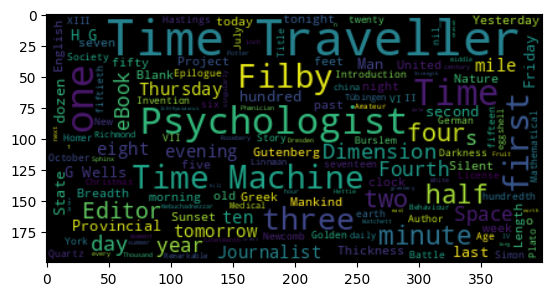

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load("en_core_web_sm")

tag_group = {}

with open("time_machine_short.txt") as fl:
    text = fl.read()
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ not in tag_group:
            tag_group[entity.label_] = [entity.text]
        else:
            tag_group[entity.label_].append(entity.text)
    ent_str = ''
    for ent in doc.ents:
        ent_str += ' ' + ent.text
    wordcloud = WordCloud().generate(ent_str)
    plt.imshow(wordcloud, interpolation='bilinear')

for el in tag_group:
    print(f'{el}: {tag_group[el]}')
    print()
    print()

#### Challenge the NER tagger 
- Write a short text (few sentences) and try to create wrong tags by combining existing named entities or invent new ones. 
- Examples: "Republic of Bananas", "Palo Alto" "Palo Alto Networks" "Palo Alto Network Solutions" (here you could also try what happens in case you use improper spelling like "Palo Alto network solutions").
- Also use proper names and introduce a little type, e.g. "Nurmberg"
- Try lower case (germany, palo alto networks)

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load("en_core_web_sm")

tag_group = {}

text = "On th 5th of Febary i went to Numberg to visit a museum."
doc = nlp(text)

for word in doc:
    if word.tag_ not in tag_group:
        tag_group[word.tag_] = [entity.text]
    else:
        tag_group[word.tag_].append(entity.text)

for el in tag_group:
    print(f'{el}: {tag_group[el]}')
    print()
    print()

IN: ['Numberg', 'Numberg', 'Numberg', 'Numberg']


NN: ['Numberg', 'Numberg']


NNP: ['Numberg', 'Numberg']


PRP: ['Numberg']


VBD: ['Numberg']


TO: ['Numberg']


VB: ['Numberg']


DT: ['Numberg']


.: ['Numberg']




## Bag of Words, Tf-idf
We will use a textbook example´, the 20 Newsgroups Dataset 
- Load the dataset from scikit-learn (we will use just the training dataset)
- How many documents do you encounter? What is the content of a single document?
- Determine the bag-of-words matrix for the dataset.

Look at 20 documents you select randomly:
- What are the ten words with the highest counts?
- Repeat with Tf-idf instead of bag-of-words.

The machine learning package scikit-learn provides very well usable implementations for bag-of-words and Tf-idf.


In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = fetch_20newsgroups(subset='train')['data']

random.seed(42)
random_documents = random.sample(data, 20)

vectorizer = CountVectorizer()
transformer = TfidfVectorizer()

vecto = vectorizer.fit_transform(random_documents)
transfo = transformer.fit_transform(random_documents)

bow_matrix_vecto = vecto.toarray()
bow_matrix_transfo = transfo.toarray()

word_counts_vecto = np.sum(bow_matrix_vecto, axis=0)
word_counts_transfo = np.sum(bow_matrix_transfo, axis=0)

top_10_indices_vecto = np.argpartition(word_counts_vecto, -10)[-10:]
top_10_indices_transfo = np.argpartition(word_counts_transfo, -10)[-10:]

print(bow_matrix_vecto)
print(bow_matrix_transfo)

vocabulary = vectorizer.get_feature_names_out()

for i in top_10_indices_vecto:
    print(vocabulary[i])

print()

for i in top_10_indices_transfo:
    print(vocabulary[i])

#print(len(data))
#print(data[0])

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 1 1 ... 0 0 0]]
[[0.         0.         0.         ... 0.         0.         0.09057896]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.06305259 0.03152629 0.03152629 ... 0.         0.         0.        ]]
for
in
it
and
that
will
is
to
of
the

he
that
and
of
the
to
in
edu
it
is
